 0.0000 Customer00: Arrival 
 0.0000 Customer00: Waited  0.000
 0.7714 Customer00: Finished
 0.8641 Customer01: Arrival 
 0.8641 Customer01: Waited  0.000
 0.8788 Customer01: Finished
 2.0723 Customer02: Arrival 
 2.0723 Customer02: Waited  0.000
 2.2219 Customer03: Arrival 
 2.6929 Customer04: Arrival 
 2.7608 Customer02: Finished
 2.7608 Customer03: Waited  0.539
 3.0388 Customer03: Finished
 3.0388 Customer04: Waited  0.346
 3.0493 Customer04: Finished
 3.0740 Customer05: Arrival 
 3.0740 Customer05: Waited  0.000
 3.1311 Customer05: Finished
 3.1877 Customer06: Arrival 
 3.1877 Customer06: Waited  0.000
 3.3610 Customer07: Arrival 
 3.3800 Customer08: Arrival 
 3.4563 Customer06: Finished
 3.4563 Customer07: Waited  0.095
 3.5933 Customer09: Arrival 
 3.5974 Customer10: Arrival 
 3.6147 Customer07: Finished
 3.6147 Customer08: Waited  0.235
 3.7755 Customer11: Arrival 
 4.1233 Customer12: Arrival 
 4.4981 Customer08: Finished
 4.4981 Customer09: Waited  0.905
 4.7451 Customer09: Fi

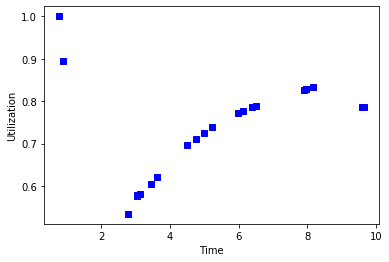

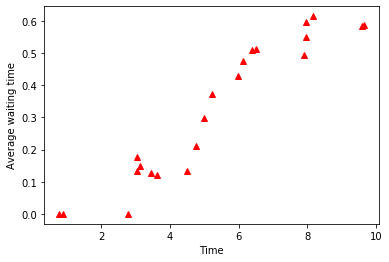

In [32]:
# Simulation of an M/M/n queue

import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

servers = 1
customers = 30
runtime = 10
arrivals = 2
processing = 3

timing = []
waitingtime = []
utilization = []

def source(env, counter):
    for i in range(customers):
        c = customer(env, 'Customer%02d' % i, counter)
        env.process(c) # Add new customer process
        t = random.expovariate(arrivals)
        yield env.timeout(t) # Wait until interarrival time has passed
        
def customer(env, name, counter):
    arrive = env.now
    print('%7.4f %s: Arrival ' % (arrive, name))
    
    with counter.request() as req:
        # Wait for the counter to be free
        yield req
        
        wait = env.now - arrive    
        waitingtime.append(wait)
        # We got to the counter
        print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
        tib = random.expovariate(processing) # Processing time
        utilization.append(tib)
        yield env.timeout(tib) # Wait until processing is done
        
        print('%7.4f %s: Finished' % (env.now, name))
        timing.append(env.now)

env = simpy.Environment() #create simulation environment

counter = simpy.Resource(env, capacity=servers) # simpy resources
env.process(source(env,counter))
env.run(until=runtime)

print("Utilization: "+str(np.sum(utilization)/runtime))
print("Average waiting time: "+str(np.mean(waitingtime)))

utu = []
wtu = []
for k in range(len(timing)):
  utu.append(np.sum(utilization[:k+1])/timing[k])
  wtu.append(np.sum(waitingtime[:k+1])/(k+1))  
 
plt.plot(timing,utu,'bs')
plt.xlabel("Time")
plt.ylabel("Utilization")
plt.show()

plt.plot(timing,wtu,'r^')
plt.xlabel("Time")
plt.ylabel("Average waiting time")
plt.show()